# Instalando dependências

In [1]:
%pip install pandas
%pip install matplotlib
%pip install -U google-generativeai
%pip install python-decouple
%pip install python-dotenv
%pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Criando um promt para a classificação

In [2]:
import google.generativeai as genai
from decouple import config
from dotenv import load_dotenv
import typing_extensions as typing
from typing import List
import json

load_dotenv()

genai.configure(api_key=config("GEMINI_KEY"))

class Classification(typing.TypedDict):
    quote: str
    result: str

def generate_quote_classification(quotes: List[str]) -> Classification:

    formated_quotes = "\n".join([f"<quote>{quote}</quote>" for quote in quotes])

    prompt = f"""
    <sentment_classifier>
        You are a assistant created to emulate the best sentiment analysis model in the world. 
    <sentment_classifier>

    1. Allways respond in JSON format.
    2. Do not take a political stance on the classification.
    3. Always chose one of the following classes: positive, negative, neutral.

    <example>
        <quote>"D'oh! I can't believe I did that again!"</quote> 
        negative 
    </example>

    <example> 
        <quote>"You can't always win, but at least you can try to do good."</quote> 
        positive 
    </example> 
    
    <example> 
        <quote>"I'm Bart Simpson, who the hell are you?"</quote> 
        neutral 
    </example> 
    
    <example> 
        <quote>"Oh, Homie, you know the important thing is that we're together as a family."</quote> 
        positive 
    </example> 
    
    <example> 
        <quote>"Excellent..."</quote> 
        neutral 
    </example>

    {formated_quotes}
    """



    model = genai.GenerativeModel("gemini-1.5-flash")
    response = model.generate_content(prompt, generation_config=genai.GenerationConfig(response_mime_type="application/json", response_schema = list[Classification]))
    
    return json.loads(response.text)

c:\Users\mateus\projects\infnet\promteng\tp3\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Loading simpsons speech ep 92 (episode_id) of season 5 (episode_season)

In [ ]:
import pandas as pd

df = pd.read_csv("./data/thesimpsons/simpsons_script_lines.csv")
df = df.dropna(subset=["normalized_text"])
chosen_quotes = df[df["episode_id"] == 92]
step_size = 50

results = []

for i in range(0, len(chosen_quotes), step_size):
    quotes = chosen_quotes["normalized_text"].iloc[i:i+step_size].tolist()
    results.extend(generate_quote_classification(quotes))
    



C:\Users\mateus\AppData\Local\Temp\ipykernel_22572\3823457550.py:3: DtypeWarning: Columns (4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./data/thesimpsons/simpsons_script_lines.csv")


In [ ]:
results

[{'quote': 'cant talk robbed go hell', 'result': 'negative'},
 {'quote': 'dad weve been robbed', 'result': 'negative'},
 {'quote': 'wake up dad wake up there was a burglar and he took my saxophone',
  'result': 'negative'},
 {'quote': 'woo hoo', 'result': 'positive'},
 {'quote': 'and our portable tv', 'result': 'negative'},
 {'quote': 'and my necklace', 'result': 'negative'},
 {'quote': 'eh thats no big loss', 'result': 'neutral'},
 {'quote': 'homer that necklace was a priceless bouvier family heirloom',
  'result': 'negative'},
 {'quote': 'oh youve probably got a whole drawer full of em',
  'result': 'neutral'},
 {'quote': 'well yes i do but theyre all heirlooms too', 'result': 'neutral'},
 {'quote': 'the burglar even took my stamp collection', 'result': 'negative'},
 {'quote': 'you had a stamp collection', 'result': 'neutral'},
 {'quote': 'stamp collection haw haw', 'result': 'neutral'},
 {'quote': 'barts pain is funny but mine isnt that saxophone was my one creative outlet it was th

<Axes: xlabel='result'>

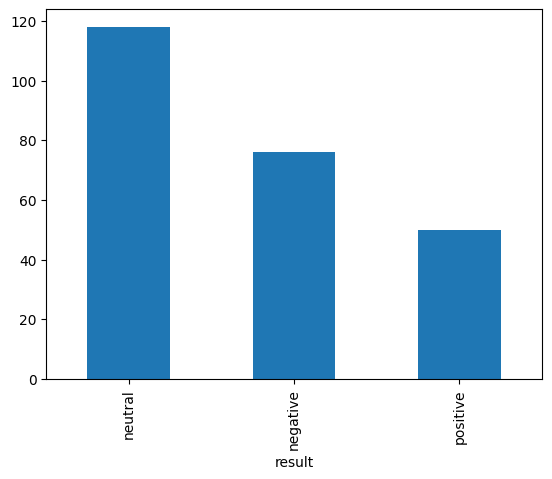

In [ ]:
df = pd.DataFrame(results)

#quote distributiuon
df["result"].value_counts().plot(kind="bar")
df.save_csv("classification.csv")